In [1]:
#数据筛选
import pandas as pd    
from sklearn import preprocessing
import pandas as pd    
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score, classification_report  
import matplotlib.pyplot as plt  
final1 = pd.read_excel('C:\\Users\\Sun\\Desktop\\石工大赛\\方法二\\Type port train.xlsx')
feature1 = final1[['井径', '补偿中子', '声波时差', '自然伽马', '深侧向电阻率', '浅侧向电阻率', '岩性密度矫正']]
target1 = final1['Type port']
final2 = pd.read_excel('C:\\Users\\Sun\\Desktop\\石工大赛\\方法二\\Type port test.xlsx')
feature2 = final2[['井径', '补偿中子', '声波时差', '自然伽马', '深侧向电阻率', '浅侧向电阻率', '岩性密度矫正']]
target2 = final2['Type port']

C_values = [1, 10, 50, 100, 500]
gamma_values = [0.0001, 0.001, 0.01, 0.1, 1]

# 用于存储每次试验的结果  
results = []  

In [3]:
import numpy as np
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import KFold, cross_val_score
# 对每一对参数组合进行十折交叉验证  
for C_value in C_values:  
    for gamma_value in gamma_values:
        model = OneVsOneClassifier(SVC(C=C_value, gamma=gamma_value))
        kfold = KFold(n_splits=10, shuffle=True, random_state=42)  
        scores = cross_val_score(model, feature1, target1, cv=kfold) 
        mean_score = np.mean(scores)  # 计算平均分数 
        results.append({'C': C_value, 'gamma': gamma_value, 'mean_score': mean_score, 'std_score': np.std(scores)}) 

In [4]:
# 将结果转换为DataFrame，方便后续处理  
results_df = pd.DataFrame(results)  

In [5]:
# 对结果进行排序，找出最佳参数组合  
results_df = results_df.sort_values(by='mean_score', ascending=False)  
best_C_value = results_df.iloc[0]['C']  
best_gamma_value = results_df.iloc[0]['gamma']  
print(f"Best parameters: C={best_C_value}, gamma={best_gamma_value}")  

Best parameters: C=500.0, gamma=0.001


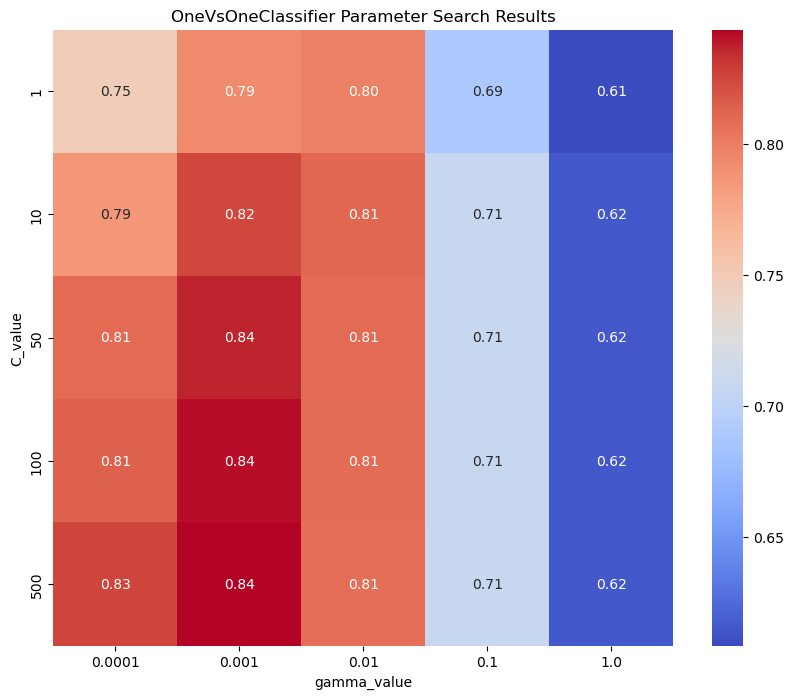

In [6]:
# 可视化结果  
import seaborn as sns
plt.figure(figsize=(10, 8))  
pivot_df = results_df.pivot(index=['C'], columns='gamma', values='mean_score')  
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt=".2f")  
plt.title('OneVsOneClassifier Parameter Search Results')  
plt.xlabel('gamma_value')  
plt.ylabel('C_value')  
plt.show()

In [7]:
#测试集准确率
model = OneVsOneClassifier(SVC(C=best_C_value, gamma=best_gamma_value))
s = model.fit(feature1, target1)
r1 = model.score(feature1, target1)
r2 = model.score(feature2, target2)
print (r1)
print (r2)
predicted = model.predict(feature2)
predicted

0.971256374594344
0.6173469387755102


array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
      dtype=int64)

In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score  
   
# 对于多分类问题，你需要选择一个适合多分类问题的average参数，如'micro', 'macro', 'weighted'  
precision = precision_score(target2, predicted, average='macro')  # 或者 'micro', 'weighted'  
recall = recall_score(target2, predicted, average='macro')  # 或者 'micro', 'weighted'  
f1 = f1_score(target2, predicted, average='macro')  # 或者 'micro', 'weighted'  
  
# 对于 AUC-ROC，你需要模型预测的概率值，而不是预测的标签  
# 这里没有average参数的问题，但是要确保y_true和y_prob的维度匹配  
# 假设 y_true 是真实的标签，y_prob 是模型预测的概率（对于多分类问题，y_prob应该是每个类别的预测概率）  
# auc_roc = roc_auc_score(target2, predicted, multi_class='ovo')  # 或者'ovr'，取决于你的具体需求和模型输出的格式

print (precision)
print (recall)
print (f1)

0.5010131053071847
0.5438086303939962
0.49772082836135567


C:\Users\Sun\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
